In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the results
with open('accuracies-over-all-hyperparameters-pca-umap.pkl', 'rb') as f:
    accuracies = pickle.load(f)
accuracies.head()

,Length Scale,Batch Count,NN Count,Accuracy,Loss,Time,Kernel,NN Method,Metric,Smoothness,Homoscedastic Noise,Embedding,Numb-comps,Data,Optimizer
0,26.537959,5,15,81.618,lool_fn,0.205946,rbf,hnsw,F2,0.131224,3.020408,umap,66,nthroot_mm03448,L_BFGS_B_optimize
1,61.228367,10,15,80.994,mse_fn,0.686558,mattern,hnsw,l2,0.959592,41.408163,umap,69,norm_31,Bayes_optimize
2,32.659796,320,40,72.996,looph_fn,12.618563,mattern,hnsw,F2,0.575714,11.102041,pca,70,nthroot_mm07586,Bayes_optimize
3,53.065918,5,30,81.875,lool_fn,0.358354,mattern,hnsw,l2,0.898980,3.020408,umap,85,nthroot_mm03793,L_BFGS_B_optimize
4,59.187755,320,10,80.554,lool_fn,1.248777,mattern,hnsw,l2,0.131224,53.530612,umap,2,nthroot_mm05517,Bayes_optimize


In [3]:
# total results
len(accuracies)

161725

In [4]:
# get rows of unique nlargest accuracies
accuracies.sort_values('Accuracy', ascending=False).drop_duplicates(['Accuracy']).head(10)

,Length Scale,Batch Count,NN Count,Accuracy,Loss,Time,Kernel,NN Method,Metric,Smoothness,Homoscedastic Noise,Embedding,Numb-comps,Data,Optimizer
83021,0.777755,20,40,84.223,looph_fn,20.662822,mattern,exact,l2,0.191837,0.102041,none,0,nthroot_mm07931,Bayes_optimize
59747,0.696939,80,30,84.168,cross_entropy_fn,14.808071,mattern,exact,F2,0.070612,0.122449,pca,78,nthroot_mm09655,Bayes_optimize
103750,0.858571,5,30,84.113,cross_entropy_fn,17.708732,mattern,exact,l2,0.212041,0.306123,none,0,nthroot_mm10,L_BFGS_B_optimize
103023,0.515102,320,40,84.040,mse_fn,22.865161,mattern,exact,l2,0.272653,0.428571,pca,63,norm_21,Bayes_optimize
81627,0.757551,80,35,84.003,lool_fn,15.562099,mattern,exact,l2,0.333265,0.387755,pca,67,nthroot_mm09655,L_BFGS_B_optimize
9028,40.822245,320,25,83.985,mse_fn,16.834590,mattern,exact,l2,0.191837,0.469388,none,0,nthroot_mm003448,Bayes_optimize
70639,0.131224,320,40,83.966,pseudo_huber_fn,27.514285,mattern,exact,l2,0.111020,1.000000,none,0,nthroot_mm08621,Bayes_optimize
59753,0.272653,20,30,83.930,mse_fn,15.660262,mattern,exact,l2,0.434286,0.224490,none,0,nthroot_mm003448,Bayes_optimize
146320,0.050408,40,40,83.911,looph_fn,12.955619,rbf,exact,l2,0.414082,0.489796,pca,73,nthroot_mm08276,L_BFGS_B_optimize
69503,55.106531,160,30,83.893,mse_fn,20.297729,mattern,exact,l2,0.252449,0.408163,none,0,norm_21,Bayes_optimize


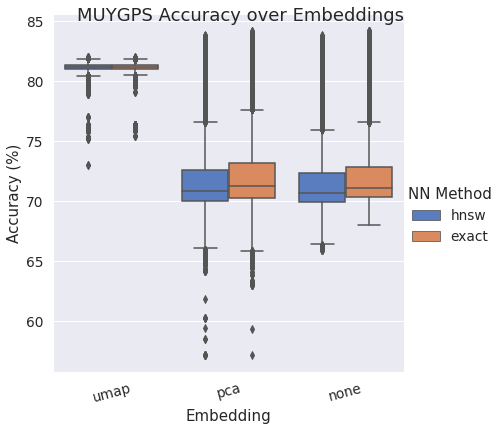

In [5]:
# use seaborn to visualize accuracy over embedding with NN method as hue
# use colorblind style
plt.style.use('tableau-colorblind10')
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(font_scale=1.25)
# increase figure size
# plt.rcParams['figure.figsize'] = [20, 8]
g = sns.catplot(x="Embedding", y="Accuracy", hue="NN Method", data=accuracies,
                height=6, kind="box", palette="muted")
# g.despine(left=True)
g.set_ylabels("Accuracy (%)")
g.set_xlabels("Embedding")
g.set_xticklabels(rotation=15)
g.fig.suptitle('MUYGPS Accuracy over Embeddings')
# plt.tight_layout()
plt.savefig('./Final-Results/accuracy-over-embeddings-nnmethod.png', dpi=500)
plt.show()

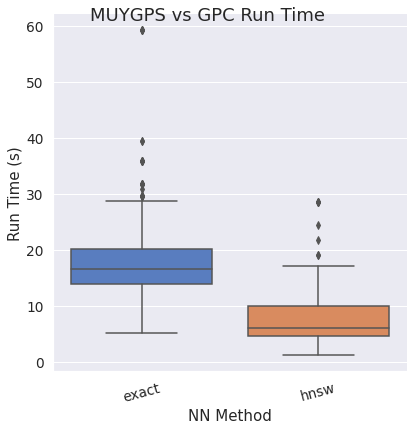

In [6]:
# make a boxplot of run time over nn method
# use colorblind style
plt.style.use('tableau-colorblind10')
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(font_scale=1.25)
# increase figure size
# plt.rcParams['figure.figsize'] = [20, 8]
g = sns.catplot(x="NN Method", y="Time", data=accuracies.nlargest(1000, 'Accuracy'),
                height=6, kind="box", palette="muted")
# g.despine(left=True)
g.set_ylabels("Run Time (s)")
g.set_xlabels("NN Method")
g.set_xticklabels(rotation=15)
g.fig.suptitle('MUYGPS vs GPC Run Time')
# plt.tight_layout()
plt.savefig('./Final-Results/run-time-over-nnmethod.png', dpi=500)
plt.show()


In [29]:
# return accuracies grouped by Data column
accuracies[accuracies['Data']=='raw_image_data'].nlargest(100, 'Accuracy').iloc[60:, :]

,Length Scale,Batch Count,NN Count,Accuracy,Loss,Time,Kernel,NN Method,Metric,Smoothness,Homoscedastic Noise,Embedding,Numb-comps,Data,Optimizer
132865,51.025306,80,30,81.141,lool_fn,3.480344,rbf,hnsw,l2,0.797959,0.081633,none,0,raw_image_data,Bayes_optimize
3140,0.575714,320,35,81.123,pseudo_huber_fn,14.074885,mattern,exact,l2,0.353469,0.857143,pca,29,raw_image_data,Bayes_optimize
3180,0.575714,320,35,81.123,pseudo_huber_fn,14.074885,mattern,exact,l2,0.353469,0.857143,pca,29,raw_image_data,Bayes_optimize
3260,0.575714,320,35,81.123,pseudo_huber_fn,14.074885,mattern,exact,l2,0.353469,0.857143,pca,29,raw_image_data,Bayes_optimize
161025,44.903469,160,10,81.104,looph_fn,12.162923,rbf,exact,l2,0.535306,1.000000,none,0,raw_image_data,L_BFGS_B_optimize
161305,44.903469,160,10,81.104,looph_fn,12.162923,rbf,exact,l2,0.535306,1.000000,none,0,raw_image_data,L_BFGS_B_optimize
161625,44.903469,160,10,81.104,looph_fn,12.162923,rbf,exact,l2,0.535306,1.000000,none,0,raw_image_data,L_BFGS_B_optimize
4420,81.634490,20,20,81.086,cross_entropy_fn,10.159621,mattern,exact,l2,0.717143,0.408163,pca,84,raw_image_data,L_BFGS_B_optimize
4500,81.634490,20,20,81.086,cross_entropy_fn,10.159621,mattern,exact,l2,0.717143,0.408163,pca,84,raw_image_data,L_BFGS_B_optimize
4620,81.634490,20,20,81.086,cross_entropy_fn,10.159621,mattern,exact,l2,0.717143,0.408163,pca,84,raw_image_data,L_BFGS_B_optimize
